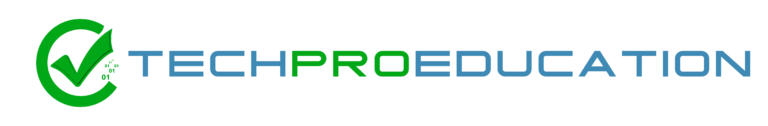

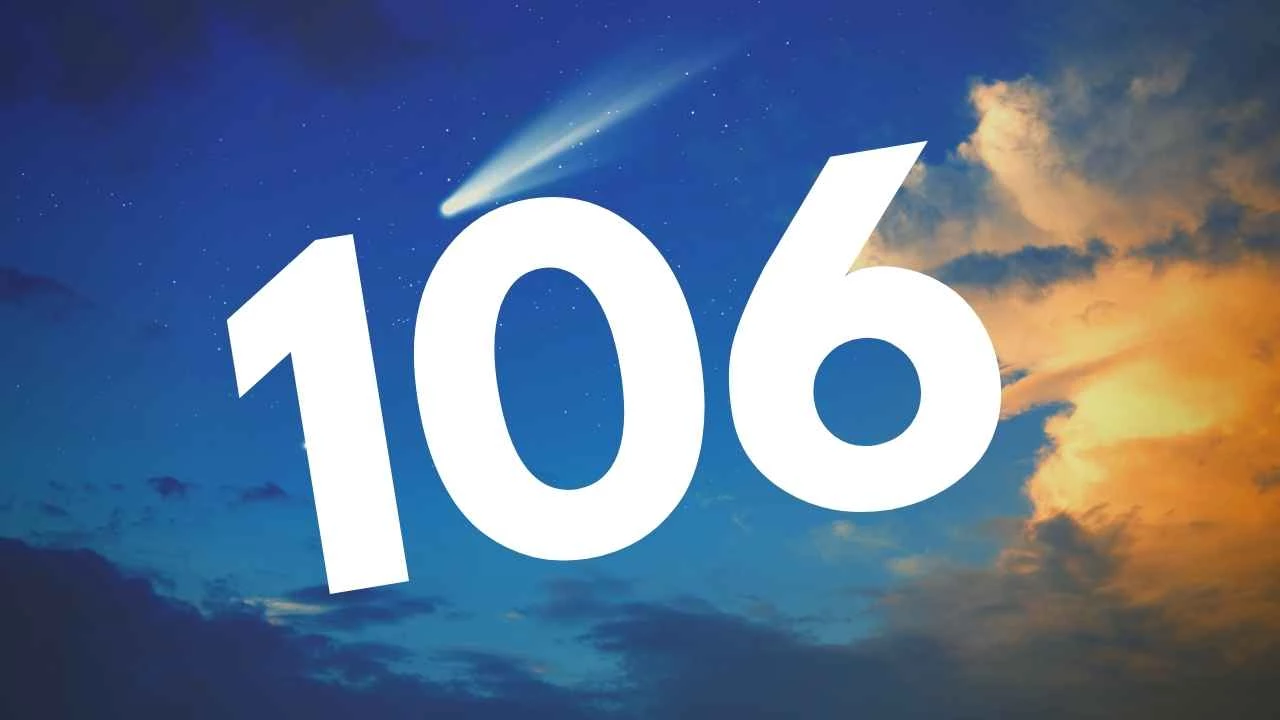

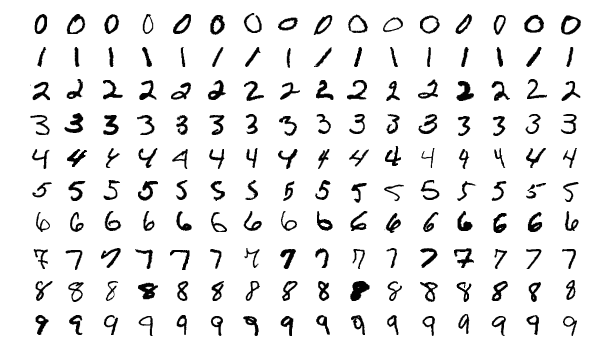

In this notebook, we are going to dive into the MNIST (Modified National Institute of Standards and Technology) database. It can be said that the MNIST handprinted character image dataset is the “Hello World” implementation for machine learning, and the dataset is used as a worldwide machine learning benchmark. It is an extremely good database for people who want to try machine learning techniques and pattern recognition methods on real-world data while spending minimal time and effort on data preprocessing and formatting. Its simplicity and ease of use are what make this dataset so widely used and deeply understood. Therefore, the goal of this tutorial is to show you how this dataset can be used in a digits recognition example using Convolutional Neural Network (CNN), which achieves a high classification accuracy on the test dataset. On a larger perspective, we will emphasize on MNIST’s importance and impact in the world of machine learning.

MNIST is a large database of small, square 28x28 pixel grayscale images of handwritten single digits between 0 and 9. It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).

Our task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively using a CNN that will be able to recognize the handwritten digits. CNN is a type of deep neural network commonly used for computer vision applications. So we will build an image classifier TensorFlow’s Keras API on the MNIST dataset. Keras is a Python library and is highly recommended for beginners due to its smooth learning curve. It is very commonly used in implementing neural networks. 

In [56]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [57]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

TensorFlow kütüphanesi altında yer alan Keras modülünden MNIST veri kümesini yüklemek için kullanılır. MNIST, el yazısı rakamlarını içeren bir veri kümesidir ve makine öğrenimi modellerinin eğitilmesi için sıklıkla kullanılır. load_data fonksiyonu, veri kümesini indirir ve yükler. Bu kodun çalışması için TensorFlow kütüphanesinin bilgisayarınızda yüklü ve kurulu olması gereklidir.

In [58]:
(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

MNIST veri kümesinden yüklenen verileri eğitim ve test veri setlerine ayırmak için kullanılır. load_data() fonksiyonu, MNIST veri kümesini yükler ve bu satırda eğitim verileri (X_train, y_train) ve test verileri (X_test, y_test) olarak ayrıştırılır. X_train ve X_test verileri, resimlerin piksel değerlerini içeren 3 boyutlu tensörlerdir. y_train ve y_test verileri ise, resimlerin doğru sınıf etiketlerini içeren 1 boyutlu tensörlerdir.

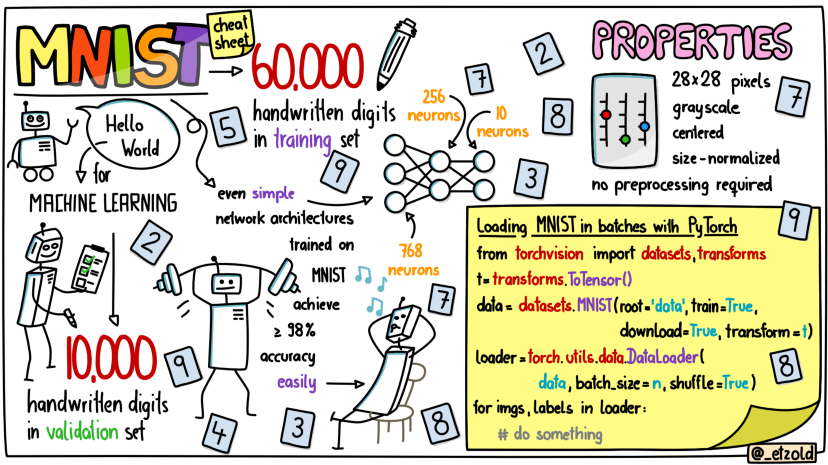

In [59]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


X_train ve y_train verilerinin şeklini ekrana yazdırır. X_train.shape ifadesi, eğitim verilerinin şeklini 3 boyutlu bir tensör olarak döndürür. Bu tensörün ilk boyutu, eğitim örneklerinin sayısıdır. İkinci ve üçüncü boyutlar, resimlerin yüksekliği ve genişliği olarak düzenlenmiştir. y_train.shape ifadesi ise, y_train verilerinin şeklini 1 boyutlu bir tensör olarak döndürür. Bu tensörün boyutu, eğitim örneklerinin sayısıdır. Her bir öğe, eşleşen örnek için doğru sınıf etiketini içerir. Bu kodun çıktısı, eğitim verilerinin şeklini ve etiketlerinin şeklini belirtir.

In [60]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


X_test tensörü, MNIST veri kümesindeki test örneklerinin görüntülerini içerir. Bu görüntüler siyah beyaz olduğundan (grayscale), her biri yalnızca bir kanala (channel) sahiptir ve bu nedenle üçüncü boyutu yoktur. Bu yüzden X_test tensörü (10000, 28, 28) şeklindedir, yani 10.000 test örneği, her biri 28x28 boyutlarında bir siyah beyaz görüntü içerir.

Bununla birlikte, eğer resimler renkli (RGB) olsaydı, her pikselin kırmızı, yeşil ve mavi kanalları olacaktı. Bu durumda, X_test tensörü üçüncü boyuta sahip olacaktı ve şekli (10000, 28, 28, 3) olacaktı.

MNIST veri kümesi, rakamların el yazısı ile yazılmış görüntülerini içerir. Bu görüntülerin sınıflandırması, yani hangi rakamın hangi görüntüye karşılık geldiğini belirleme problemi, bir dizi sınıflandırma probleminin örneğidir. MNIST veri kümesinde, her görüntü yalnızca bir rakam içerir. Bu nedenle, her bir görüntü yalnızca bir sınıfa aittir ve y_train ve y_test tensörleri, her bir görüntünün ait olduğu tek bir sınıf etiketini içerir.

y_train tensörünün boyutu, eğitim setindeki örnek sayısıdır. Örneğin, eğitim setinde 50.000 örnek varsa, y_train tensörü 50.000 boyutunda olacaktır. Her bir öğe, eşleşen örneğin doğru sınıf etiketini belirtir. y_train tensörü tek boyutlu bir tensördür, çünkü her bir öğe yalnızca bir sınıf etiketini içerir. Yani her bir öğe, örneğin "Bu görüntü 5 rakamını temsil eder" şeklinde bir bilgi içerir. Dolayısıyla, y_train tensörü tek boyutlu bir şekilde tanımlanabilir.

In [61]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [63]:
# Checking the shape of one image
X_train[68].shape

(28, 28)

In [64]:
X_train[17]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  11, 203, 229,  32,   0,   0,   0,
          0,   0],
       [  

In [65]:
X_train[768].shape

(28, 28)

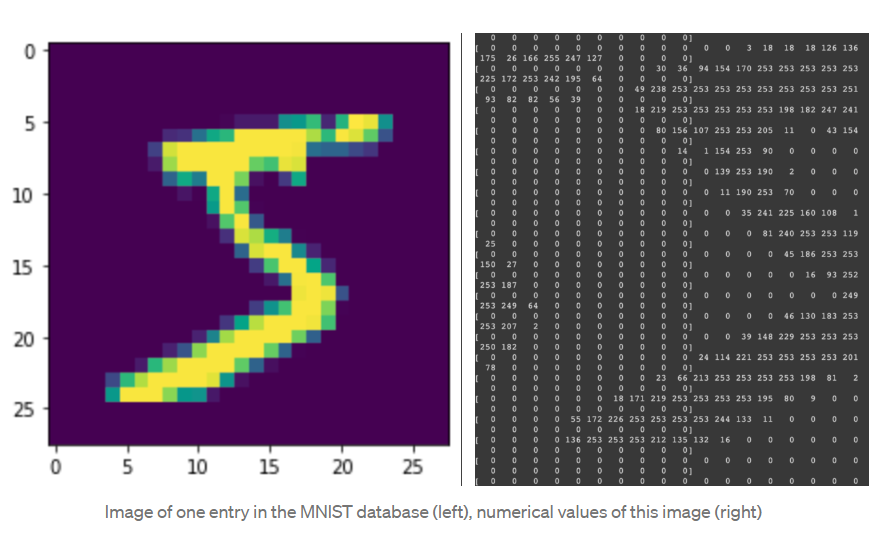

In [66]:
import matplotlib.pyplot as plt

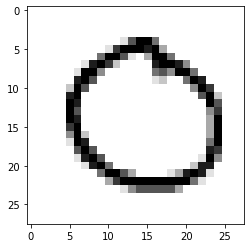

In [69]:
plt.imshow(X_train[68], cmap= plt.cm.binary)

cmap= plt.cm.binary parametresi, siyah beyaz bir görüntü elde etmek için kullanılan bir renk haritası (color map) belirtir.

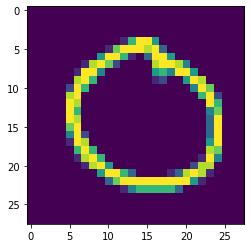

In [71]:
plt.imshow(X_train[68])

In [74]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [75]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Bu kod bloğu, MNIST veri kümesinden rastgele seçilen 3 satır ve 6 sütun boyutunda bir alt örneklem oluşturur. Daha sonra, alt örneklemdeki her örneğin etiketini (y_train) ve görüntüsünü (X_train) görüntüler.

f, ax = plt.subplots(3, 6, figsize=(12,5),... satırı, alt örneklem için 3 satır ve 6 sütundan oluşan bir alt grafik oluşturur ve ax değişkeninde saklar. gridspec_kw argümanı, alt grafiğin satır ve sütunları arasındaki boşlukları ayarlar. squeeze=True argümanı, alt grafiklerin ekstra boyutunu kaldırır ve sadece satır ve sütun boyutlarını bırakır.

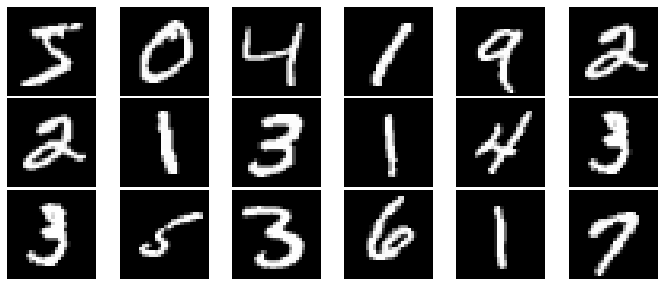

In [76]:
num_rows, num_cols = 3, 6       # Datadan 3 tane row, 6 tane column sectik.
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

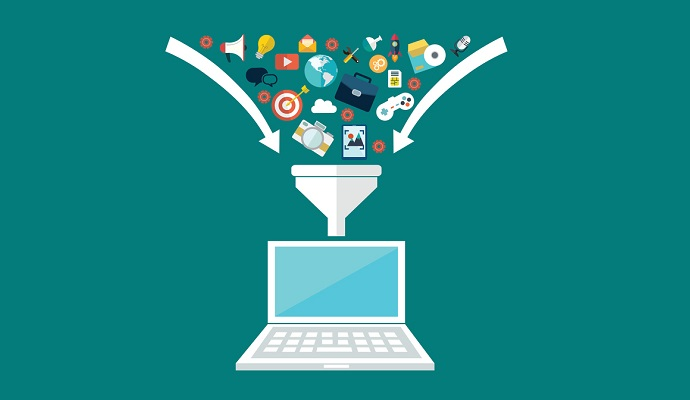

## Data Preprocessing

In [78]:
X_train[9].min()

0

In [79]:
X_train[9].max()

255

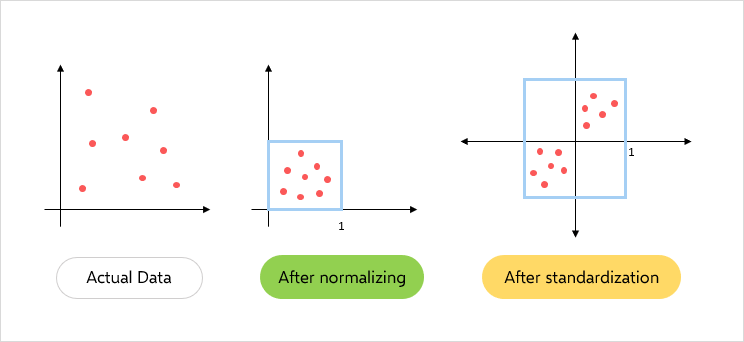

In [80]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Bu kod bloğu, MNIST veri setindeki görüntülerin piksel değerlerini 0-255 aralığından 0-1 aralığına dönüştürmek için kullanılır. İlk iki satır, X_train ve X_test numpy dizilerinin veri türünü float32'ye dönüştürür. Sonraki iki satır, her pikselin maksimum değeri olan 255'e bölerek, her pikselin 0 ile 1 arasında bir ondalık sayı olarak temsil edilmesini sağlar. Bu, ağın daha iyi öğrenmesine yardımcı olabilir ve verilerin işlenmesi daha kolay hale gelir.

In [19]:
X_train[17]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [81]:
X_train[17].min()

0.0

In [82]:
X_train[17].max()

1.0

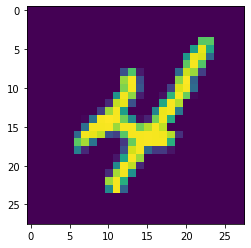

In [83]:
plt.imshow(X_train[9])

In [84]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

MNIST veri setindeki görüntüleri, konvolüsyonel sinir ağları (CNN) için uygun hale getirmek için kullanılır. reshape fonksiyonu, X_train ve X_test numpy dizilerindeki her bir görüntüyü, yükseklik ve genişlik boyutları 28x28 piksel olan ve yalnızca bir renk kanalı olan 4 boyutlu tensörlere dönüştürür.

Bu dönüşüm, CNN'lerin girdi olarak kabul ettiği tensör biçimine uymaktadır. 4 boyutlu tensörlerde ilk boyut, görüntü sayısını temsil eder, ikinci ve üçüncü boyutlar görüntü yüksekliği ve genişliğini temsil eder, dördüncü boyut ise her pikseldeki renk kanalı sayısını temsil eder (bu örnekte yalnızca 1 renk kanalı vardır).

In [85]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Eğer X_train, 28x28 boyutunda tek bir matris (shape=(60000, 28, 28)) olsaydı, onu bir CNN modeline sokmak mümkün olmazdı çünkü CNN modelleri 4 boyutlu bir veri yapısı beklerler. Bu nedenle, reshape işlemi yapılarak X_train, 4 boyutlu bir veri yapısı olan (60000, 28, 28, 1) şekline dönüştürülmüştür.

In [86]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [87]:
X_train[777].shape

(28, 28, 1)

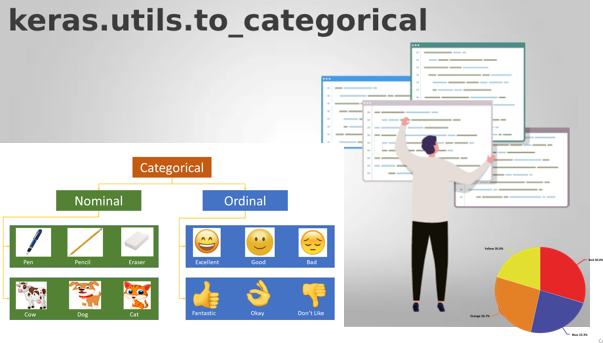

In [88]:
from tensorflow.keras.utils import to_categorical

In [89]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

Bu kod, y_train ve y_test etiketlerini (labels) ikili sınıf matrisine (binary class matrix) dönüştürüyor. Bu, çok sınıflı bir sınıflandırma problemi olduğunda kullanışlıdır. Burada 10 farklı sınıf olduğu için 10'a eşit bir şekilde 10 boyutlu bir matris oluşturuyor.

Yani, (10000, 10) şeklinde bir Y_test matrisi oluşacaktır.

to_categorical fonksiyonu, sınıflandırma problemlerinde kullanılan etiketleri (yani hedef değişkenleri) tek boyutlu tamsayı dizilerinden, her bir etiketin bir dizi içinde kodlandığı ikili (binary) formatına dönüştürür. Bu, çoklu sınıf sınıflandırma problemlerinde kullanılabilir ve bir sınıfın hangi sayıya karşılık geldiğini belirtmek için kullanılır. Örneğin, MNIST veri kümesinde, 0'dan 9'a kadar olan 10 rakamın sınıflandırılması yapılmaktadır. to_categorical fonksiyonu, bu 10 rakamın her birini 10 boyutlu bir vektörde göstererek ikili bir formata dönüştürür. Bu sayede, eğitim için kullanılan veri setindeki her örnek bir etiket olarak kullanılabilir ve ağ daha sonra her bir girdi örneği için doğru sınıfı tahmin etmeye çalışır.

Eğer verilerimizi kategorik yapmazsak, sınıflandırma modelimiz sayısal hedef değişkenlerle çalışacaktır. Bu durumda, modele sınıf etiketlerini direkt olarak vermek yerine sayısal bir değer vereceğiz ve modelimiz bu sayısal değerleri öğrenecek. Ancak, sınıf etiketleri sayısal değerlere çevrildiğinde, modelin bu sayıları birbirleriyle ilişkilendirme riski vardır. Örneğin, bir sinir ağı, sınıflar arasında bir sıralama olabileceğini ve bunu modelleyebileceğini düşünebilir.

Bu nedenle, sınıf etiketlerimizi kategorik hale getiriyoruz. Bu şekilde, sınıf etiketleri önceden tanımlanmış bir sayı değeri yerine, her sınıf için ayrı bir sütun kullanarak temsil edilir. Bu, modelin sınıfları sayısal değerlerle ilişkilendirmek yerine, her sınıfın ayrı bir etikete sahip olduğunu öğrenmesini sağlar ve modelin daha doğru sınıflandırmalar yapmasına yardımcı olur.

In [90]:
Y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

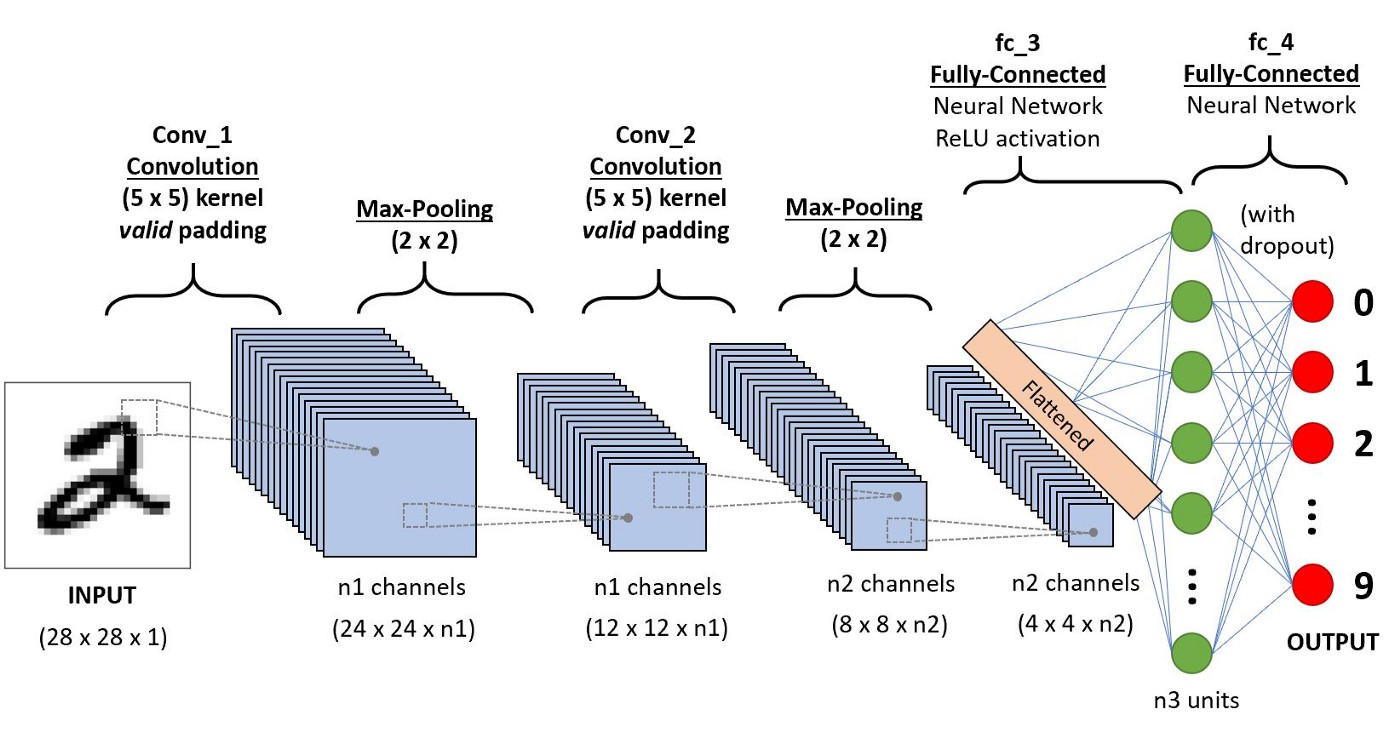

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

Burada "2D" ifadesi, iki boyutlu görüntüler üzerinde işlem yapacağımızı belirtmek için kullanılır. Yani, bu özellikle resim işleme uygulamalarında kullanılan Convolutional Neural Networks (CNN) için kullanılır. CNN'ler, 2D filtreleri kullanarak görüntü verilerinde özelliklerin çıkarılmasına izin veren bir derin öğrenme mimarisidir. Bu nedenle, CNN'ler genellikle 2D konvolüsyon, 2D Max Pooling ve 2D veri formatları kullanırlar.

Bu, sinir ağında kullanılacak verinin 2 boyutlu olduğunu gösterir. Bu durumda, veri 28x28 piksel boyutlarında olduğu için 2D olarak ifade edilir. 3D ifade, örneğin video gibi 3 boyutlu veri türleri için kullanılır.

In [31]:
model = Sequential() 

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

input_shape parametresi giriş veri boyutunu belirtmek için gereklidir. Modelin ilk katmanında bu parametre belirtilmezse, model eğitimi sırasında veri boyutu uyumsuzluğu hatası alınır. Bu nedenle, modelin ilk katmanında input_shape parametresi belirtilmelidir.

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1444 - accuracy: 0.9569 - val_loss: 0.0664 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0446 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0443 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0493 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0416 - val_accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0560 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0548 -

Batch size belirtilmediğinde varsayılan olarak 32 kullanılır. Bu nedenle batch_size=32 yerine batch_size=None yazılsa bile sonuçta aynı batch size kullanılacaktır. Ancak, bu belirsizliğe neden olduğundan, batch size'ı belirtilmesi önerilir.

In [36]:
model.metrics_names  # Modelde kullanilan metrikler

['loss', 'accuracy']

In [37]:
model.history.history   # Modelin egitimdeki loss ve accuracy history' si 

{'loss': [0.14442862570285797,
  0.0485791340470314,
  0.03174234926700592,
  0.020400673151016235,
  0.014105391688644886,
  0.009447682648897171,
  0.007380001246929169],
 'accuracy': [0.9568666815757751,
  0.9850333333015442,
  0.989633321762085,
  0.9936500191688538,
  0.9956666827201843,
  0.9968500137329102,
  0.9976000189781189],
 'val_loss': [0.06636720150709152,
  0.04463304951786995,
  0.04427005723118782,
  0.04933098331093788,
  0.04162734001874924,
  0.05601071938872337,
  0.05480242148041725],
 'val_accuracy': [0.9789999723434448,
  0.9843000173568726,
  0.9850000143051147,
  0.9836000204086304,
  0.9857000112533569,
  0.9842000007629395,
  0.9854999780654907]}

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.144429,0.956867,0.066367,0.9790
1,0.048579,0.985033,0.044633,0.9843
2,0.031742,0.989633,0.044270,0.9850
3,0.020401,0.993650,0.049331,0.9836
4,0.014105,0.995667,0.041627,0.9857


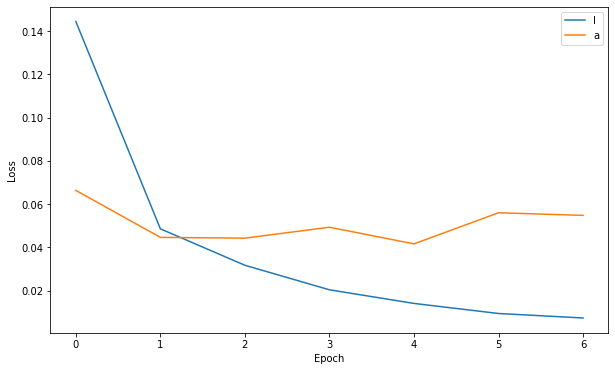

In [39]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              # DataFrame' den cekilen loss degerleri
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

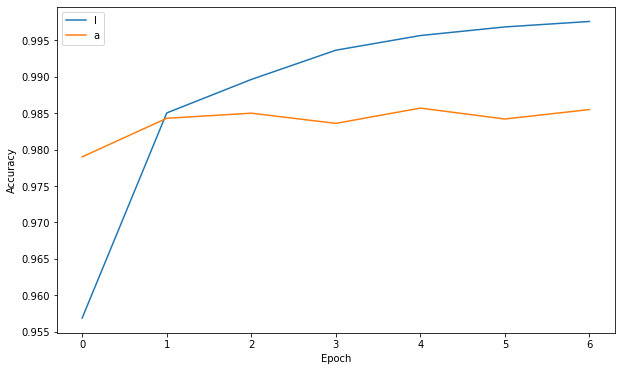

In [40]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        # DataFrame' den cekilen accuracy degerleri
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [41]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 7ms/step - loss: 0.0548 - accuracy: 0.9855
[0.05480242148041725, 0.9854999780654907]


In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
preds = model.predict(X_test)
preds

array([[3.11287481e-13, 6.24256983e-12, 2.65339084e-10, ...,
        1.00000000e+00, 2.27909969e-14, 9.74102465e-11],
       [3.58908910e-12, 7.01206315e-11, 1.00000000e+00, ...,
        1.09945935e-14, 1.86003967e-15, 7.11501831e-15],
       [4.32128040e-08, 9.99967098e-01, 1.06556775e-09, ...,
        3.93044184e-06, 1.11050549e-05, 1.10690035e-08],
       ...,
       [1.49180679e-19, 6.79438263e-14, 1.61101779e-18, ...,
        2.24981470e-12, 3.33496036e-10, 2.43160242e-10],
       [4.67071649e-16, 2.67388925e-18, 1.32256021e-19, ...,
        7.69516761e-14, 1.10635462e-07, 1.37582825e-14],
       [3.24766283e-13, 6.45082590e-15, 1.58372458e-12, ...,
        1.56660687e-18, 2.07921094e-12, 4.82915824e-16]], dtype=float32)

preds değişkeni, modelimiz tarafından tahmin edilen test veri setindeki her bir görüntünün sınıf tahminlerini içeren bir numpy dizisidir. Yani, her bir test görüntüsü için, modelimiz tarafından öngörülen sınıfın olasılıklarını gösterir.

In [44]:
preds[0]

array([3.1128748e-13, 6.2425698e-12, 2.6533908e-10, 8.7479224e-10,
       1.1684062e-13, 8.4148115e-15, 3.2866485e-16, 1.0000000e+00,
       2.2790997e-14, 9.7410247e-11], dtype=float32)

In [45]:
predictions= np.argmax(preds, axis=1)


predictions adlı değişkene, preds adlı numpy dizisindeki en yüksek olasılığa sahip sınıfın indeksleri atanıyor. axis=1 parametresi, argmax işleminin sütunlara göre (yani her örnekteki sınıf olasılıklarının karşılaştırılması) yapılacağını belirtir. Sonuç olarak, predictions dizisi, preds dizisindeki her örnek için en yüksek olasılığa sahip sınıfın indekslerini içerir.

In [46]:
len(predictions)

10000

In [47]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

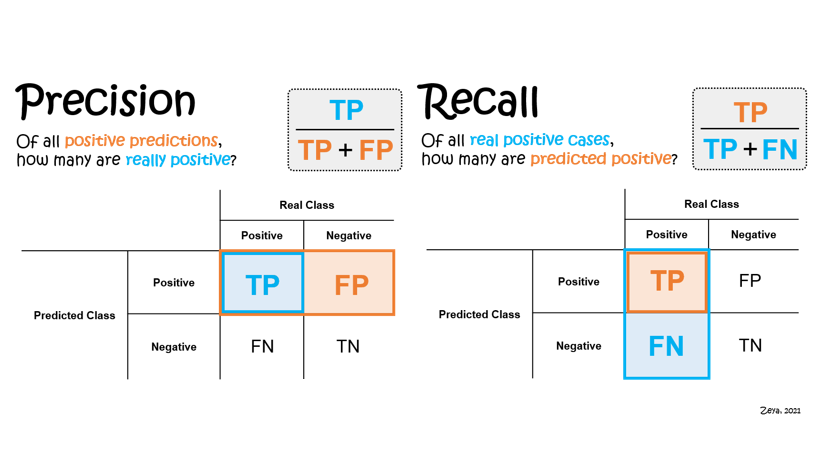

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [49]:
print(confusion_matrix(y_test, predictions))

[[ 977    1    0    0    0    0    1    1    0    0]
 [   1 1125    2    2    0    0    2    1    2    0]
 [   3    1 1015    0    1    0    1    7    4    0]
 [   0    0    2 1000    0    3    0    2    3    0]
 [   0    0    0    0  965    0    3    0    1   13]
 [   1    0    1   15    0  866    4    0    4    1]
 [   8    2    0    0    4    1  939    0    4    0]
 [   1    0    2    2    0    0    0 1018    1    4]
 [   4    0    1    2    0    0    2    4  958    3]
 [   1    2    0    3    1    0    0    4    6  992]]


In [50]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05480242148041725
Test accuracy: 0.9854999780654907


In [51]:
my_number = X_test[5]

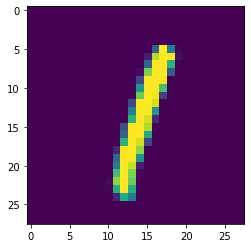

In [52]:
plt.imshow(my_number.reshape(28,28));     # 5. indexteki resmi görüntüle

In [53]:
model.predict(my_number.reshape(1,28,28,1))

array([[1.44136685e-08, 9.99951482e-01, 9.82140549e-11, 6.25394875e-11,
        3.82881495e-07, 3.10970383e-09, 1.13080201e-09, 4.33116256e-05,
        4.91219316e-06, 1.87080413e-08]], dtype=float32)

In [54]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

In [55]:
model.save("cnn-1.h5")

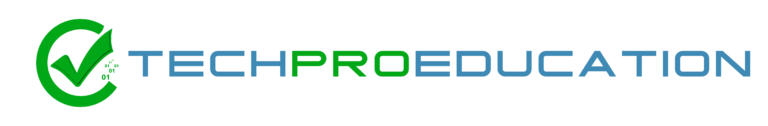

In [95]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

# MNIST verisetini yükle
(_, _), (X_test, y_test) = mnist.load_data()

# Modeli yükle
model = load_model("cnn-1.h5")

# Örnek veri seç ve modelimizden tahmin al
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx]
prediction = model.predict(sample.reshape(1, 28, 28, 1))

# Tahmin sonucunu ekrana yazdır
print(f"Gerçek Etiket: {y_test[idx]}")
print(f"Tahmin Edilen Etiket: {np.argmax(prediction)}")


Gerçek Etiket: 9
Tahmin Edilen Etiket: 9


Bu kod bloğunu çalıştırdığımızda, rastgele bir resim seçilir, bu resim modelimize verilir ve modelimizden tahmin alınır. Sonuç olarak gerçek etiket ve tahmin edilen etiket ekrana yazdırılır.

Bu kod önce X_test'den rastgele bir örnek (sample) seçer, ardından bu örneği modelin girdi şekline (input shape) uygun olarak yeniden boyutlandırır. Daha sonra predict() fonksiyonunu kullanarak bu örneğin sınıf tahminini alır.